# P2 Smart City

## Environnement virtuel

Voici le nom de l'environement *p2env*

## Importation des librairies python spécialisées

In [2]:
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('p2-arbres-fr.csv', sep=';')

## Brève description du jeu de donnée

In [4]:
df.info()
# 18 colonnes
# 200137  lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

## Calcules des indicateurs statistiques basiques (moyenne et écart-type)  pour les différentes colonnes


### Nombre de colonnes et de lignes

In [5]:
df.shape

(200137, 18)

### Vision Courte :

In [6]:
#df.describe()

### Vision longue :

In [7]:
#df.describe(include='all')

#### énumération des colonnes

In [8]:
df.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

#### Type de chaque colonne :

In [9]:
#df.dtypes

## Comparer l'ordre de grandeur des grandeurs statistiques des différentes colonnes

In [10]:
#df.describe()

In [11]:
print('cette donnée : max hauteur d\'arbre est trop grande : %s m.' % max(df.hauteur_m))
print('Ainsi que le maximun de la circonference : %s cm' % max(df.circonference_cm))

cette donnée : max hauteur d'arbre est trop grande : 881818 m.
Ainsi que le maximun de la circonference : 250255 cm


##  Données manquantes :

In [12]:
df.isnull().any()
# False n'a pas de null
# True à des null
# A traiter 
df.columns[df.isnull().any()]

Index(['domanialite', 'complement_addresse', 'numero', 'libelle_francais',
       'genre', 'espece', 'variete', 'stade_developpement', 'remarquable'],
      dtype='object')

## Nombres des données manquantes :

In [13]:
df.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [14]:
df.shape

(200137, 18)

### Suppression des données manquantes

In [15]:
df.dropna(subset=['libelle_francais','espece','domanialite','genre'],inplace=True)

In [16]:
df.shape

(197252, 18)

In [17]:
### Suppressions de doublons

In [18]:
df.drop_duplicates(keep=False, inplace=True)

In [19]:
df.shape

(197252, 18)

# Identification des valeurs aberrantes avec la règle 1,5 x écart interquartile
https://fr.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
    
https://www.it-swarm.dev/fr/python/detecter-et-exclure-les-valeurs-aberrantes-dans-le-cadre-de-donnees-pandas/1046331960/

#### valeur aberrantes avec la régle 1,5 écart interquartile

In [20]:
from scipy.stats import iqr

def remove_outliers(df, q=0.05):
    upper = df.quantile(1-q)
    lower = df.quantile(q)
    mask = (df < upper) & (df > lower)
    return mask
print(df.shape)
#hauteur
df=df[remove_outliers(df['hauteur_m'],0.1)]
print(df.shape)
#circonference
df=df[remove_outliers(df['circonference_cm'],0.1)]
print(df.shape)

(197252, 18)
(136411, 18)
(105192, 18)


## Valeur aberrantes avec la régle 1,5 écart interquartile par genre

i=0
#for date, row in df.iterrows():
        
genre=df['genre'].unique()

genre.shape
# parcourir le genre
for g in genre:
    print(g)
    for line, c in df.iterrows():
        if c['genre'] == d[g] :
            df['outliers']=df[remove_outliers(df['circonference_cm'],0.1)]
    

# Analyse univarié 

## Variable discrète : numériques 

## Hauteur

AttributeError: module 'seaborn' has no attribute 'plot'

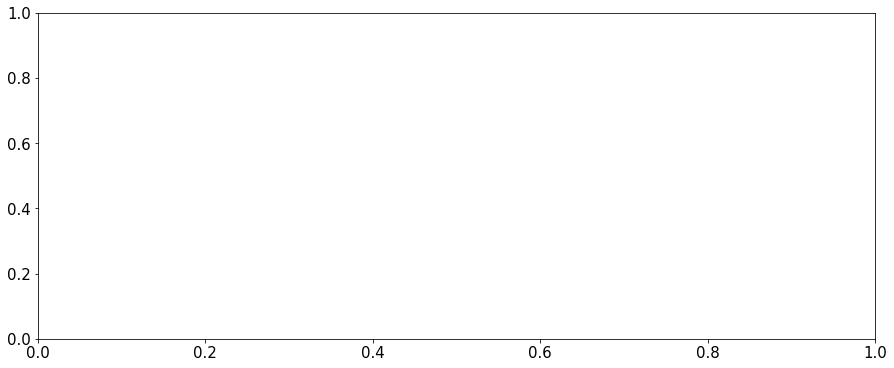

In [21]:
#font pour matplot
plt.rcParams.update({ 'font.size' : 15})


fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.plot( y='hauteur_m', data=df)

plt.xticks(size=5)

#subplot(NbZonesHauteur,NbZonesLargeur,NumeroZone)
plt.subplot(1,2,1)

#l'histogramme sans bins
df.hauteur_m[df.hauteur_m< 100].hist()
#titre du tableau
plt.title("Hauteur, Histogramme")


plt.subplot(1,2,2)
df[df.hauteur_m< 100].hauteur_m.hist(bins=100)
plt.title("Hauteur histogramme avec écart")


plt.subplots(1,1)

#enlevons les valeurs aberante grace au log
#arbres['log_hauteur']= np.log(arbres.hauteur_m) + 1
#arbres.log_hauteur.hist(bins=100)
#plt.title("Hauteur histogramme log")

plt.hist(np.log(df['hauteur_m']+1),bins = 100)
plt.title("Hauteur histogramme log")

## Circonférence 

Text(0.5, 1.0, 'Histogramme circonférence  log')

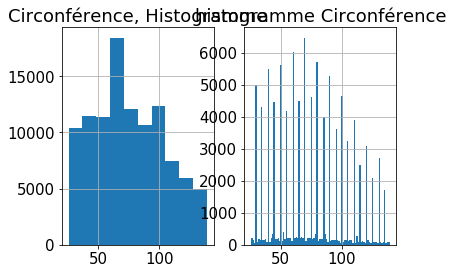

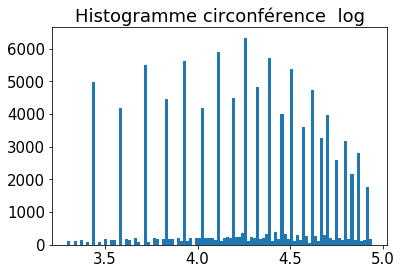

In [22]:
plt.subplot(1,2,1)

#l'histogramme sans bins
df.circonference_cm.hist()
#titre du tableau
plt.title("Circonférence, Histogramme")


plt.subplot(1,2,2)
df.circonference_cm.hist(bins=100)
plt.title("histogramme Circonférence")


plt.subplots(1,1)

#enlevons les valeurs aberante grace au log
df['log_hauteur']= np.log(df.hauteur_m) + 1
#arbres.log_hauteur.hist(bins=100)
#plt.title("Hauteur histogramme log")

plt.hist(np.log(df['circonference_cm']+1),bins = 100)
plt.title("Histogramme circonférence  log")

In [23]:
## Type_emplacement 

Text(0.5, 1.0, 'Circonférence, Histogramme')

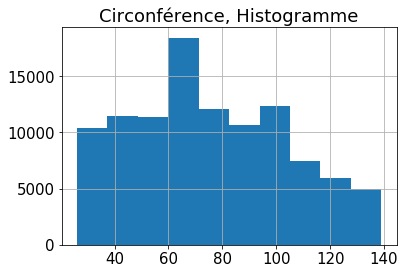

In [24]:
#l'histogramme sans bins
df.circonference_cm.hist()
#titre du tableau
plt.title("Circonférence, Histogramme")


## Variable de catégorie

In [25]:
## Domanialite

In [26]:
# df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
#df[['domanialite','id']].groupby(['domanialite']).agg(['count'])

df[['domanialite']].groupby('domanialite')['domanialite'].count().sort_values(ascending=False)

#.sort_values('id', ascending=False))

domanialite
Alignement      68477
Jardin          16775
CIMETIERE        9003
PERIPHERIQUE     3936
DASCO            3679
DJS              2463
DFPE              846
DAC                13
Name: domanialite, dtype: int64

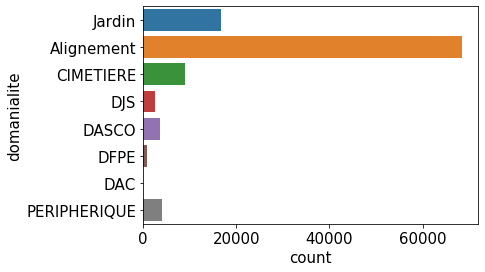

In [27]:
sns.countplot( y='domanialite', data=df)

In [28]:
## Arrondissement

In [29]:
df[['arrondissement']].groupby('arrondissement')['arrondissement'].count().sort_values(ascending=False)

arrondissement
PARIS 13E ARRDT      9896
PARIS 16E ARRDT      9843
PARIS 12E ARRDT      9037
PARIS 15E ARRDT      8604
PARIS 20E ARRDT      7998
PARIS 14E ARRDT      7821
PARIS 19E ARRDT      6198
PARIS 17E ARRDT      5762
PARIS 7E ARRDT       5613
PARIS 18E ARRDT      5445
PARIS 8E ARRDT       4632
BOIS DE VINCENNES    4534
PARIS 11E ARRDT      3944
SEINE-SAINT-DENIS    2987
BOIS DE BOULOGNE     2026
PARIS 4E ARRDT       1761
PARIS 10E ARRDT      1695
VAL-DE-MARNE         1541
PARIS 5E ARRDT       1353
PARIS 6E ARRDT       1158
PARIS 1ER ARRDT       937
PARIS 3E ARRDT        875
PARIS 9E ARRDT        729
HAUTS-DE-SEINE        442
PARIS 2E ARRDT        361
Name: arrondissement, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

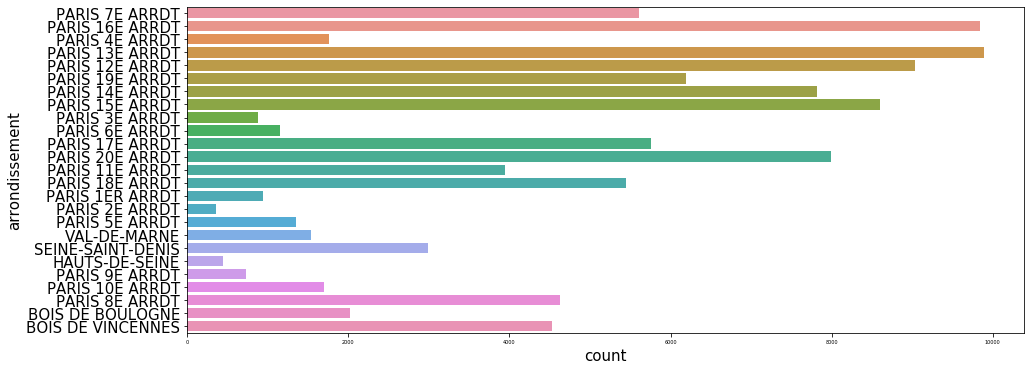

In [30]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( y='arrondissement', data=df)

plt.xticks(size=5)

In [31]:
## libelle_francais,

In [32]:
df[['libelle_francais','id']].groupby(['libelle_francais']).agg(['count'])

,id
,count
libelle_francais,
Abelia,1
Abricotier,3
Ailante,497
Alisier,101
Althéa,4
...,...
Troëne,60
Tsuga,5


In [33]:
df.count()

id                     105192
type_emplacement       105192
domanialite            105192
arrondissement         105192
complement_addresse     19175
numero                      0
lieu                   105192
id_emplacement         105192
libelle_francais       105192
genre                  105192
espece                 105192
variete                 19317
circonference_cm       105192
hauteur_m              105192
stade_developpement     88656
remarquable             81933
geo_point_2d_a         105192
geo_point_2d_b         105192
log_hauteur            105192
dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]),
 <a list of 156 Text xticklabel objects>)

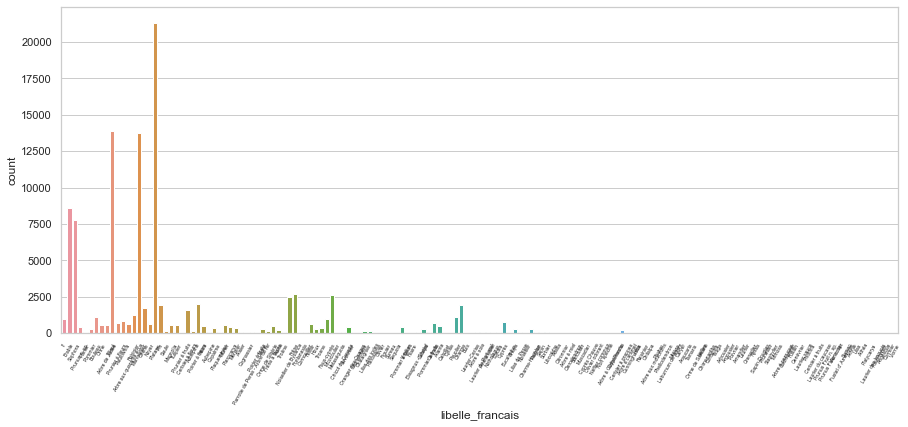

In [34]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
import seaborn as sns
sns.set(style="whitegrid")

fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="libelle_francais", data=df)
plt.xticks(rotation=60,size=5)

In [35]:
## genre

In [36]:
df[['genre','id']].groupby(['genre']).agg(['count'])

,id
,count
genre,
Abelia,1
Abies,51
Acacia,2
Acer,8568
Aesculus,13761
...,...
Viburnum,2
Zanthoxylum,4


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133]),
 <a list of 134 Text xticklabel objects>)

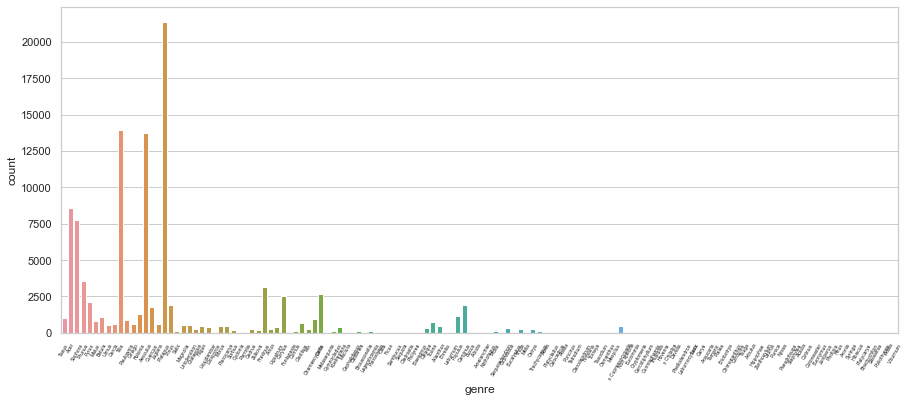

In [37]:


fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="genre", data=df)
plt.xticks(rotation=60,size=5)

In [38]:
## espece

In [39]:
df[['espece','id']].groupby(['espece']).agg(['count'])

,id
,count
espece,
Fleur n. sp.,6
Fruit n. sp.,2
abies,73
acalycina,1
acerifolius,1
...,...
x turneri,18
x watereri,3


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

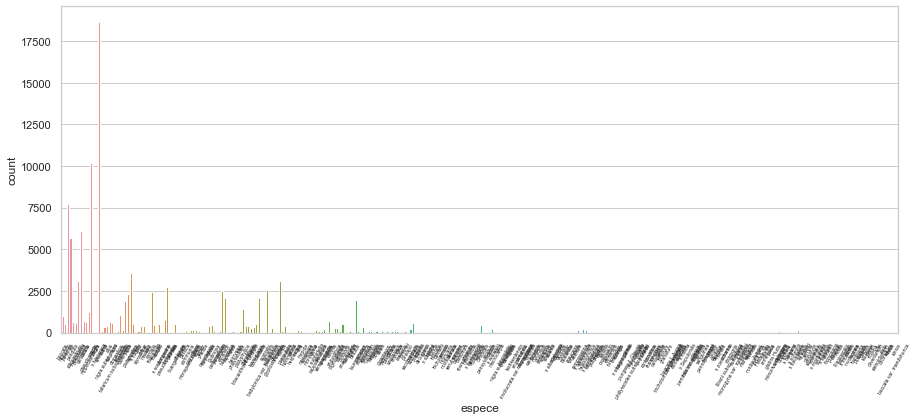

In [40]:


fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="espece", data=df)
plt.xticks(rotation=60,size=5)

In [41]:
### Variété

In [42]:
df[['variete','id']].groupby(['variete']).agg(['count'])

,id
,count
variete,
Aberdoniae',19
Alba',4
Albertii',1
Albomarginata',3
Altena',66
...,...
Westhof's Glorie',175
Worplesdon',1


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

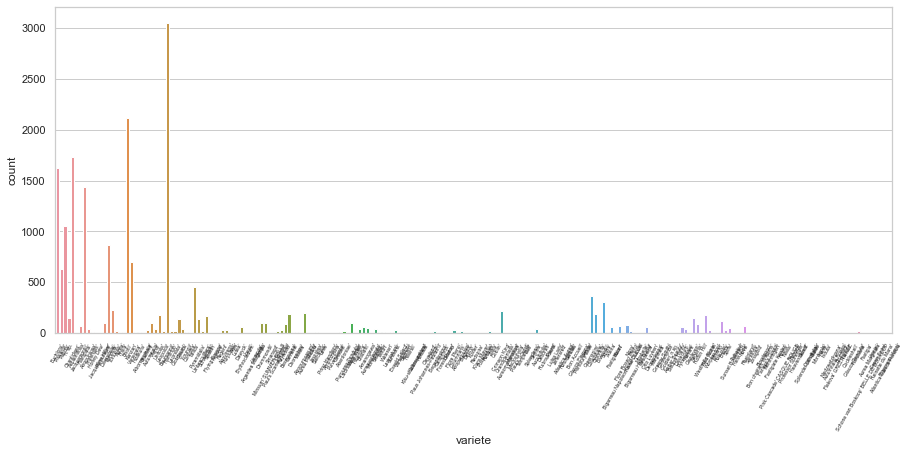

In [43]:

fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.countplot( x="variete", data=df)
plt.xticks(rotation=60,size=5)

E:\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.war

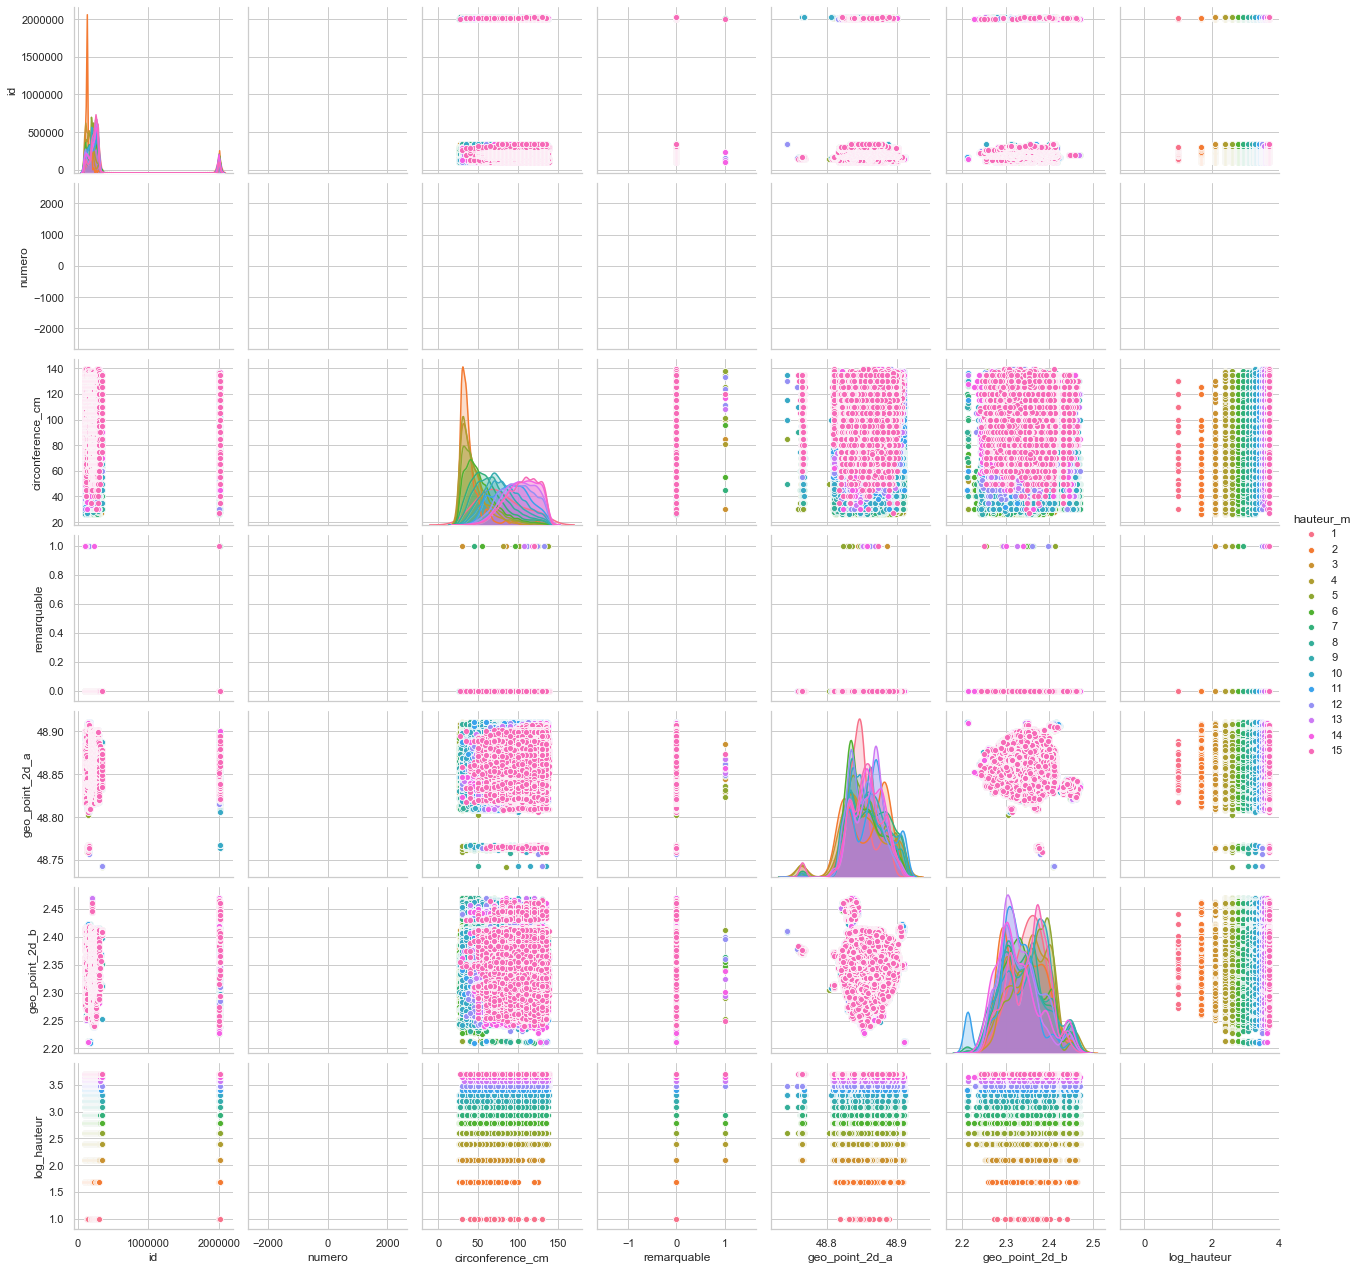

In [44]:
sns.pairplot(data=df, hue="hauteur_m");

In [ ]:
sns.pairplot(data=df, hue="circonference_cm");

In [90]:
## Bivarié

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133]),
 <a list of 134 Text xticklabel objects>)

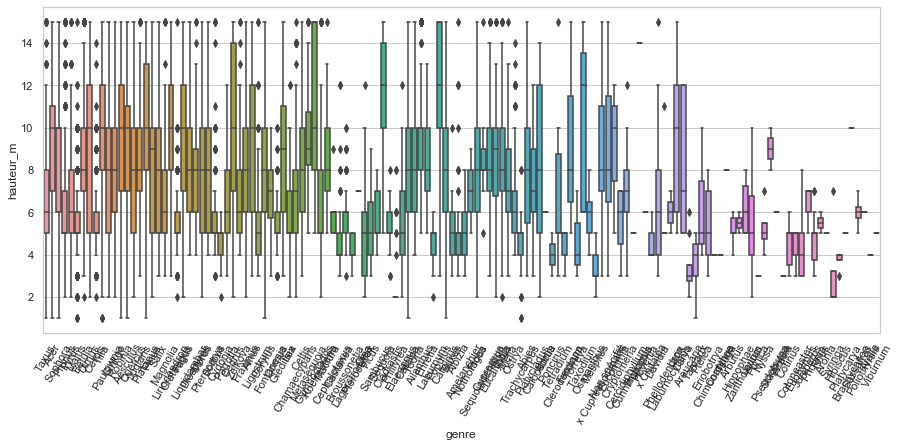

In [270]:

fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.boxplot(y= 'hauteur_m', x= 'genre' , data = df)
plt.xticks(rotation=60)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133]),
 <a list of 134 Text xticklabel objects>)

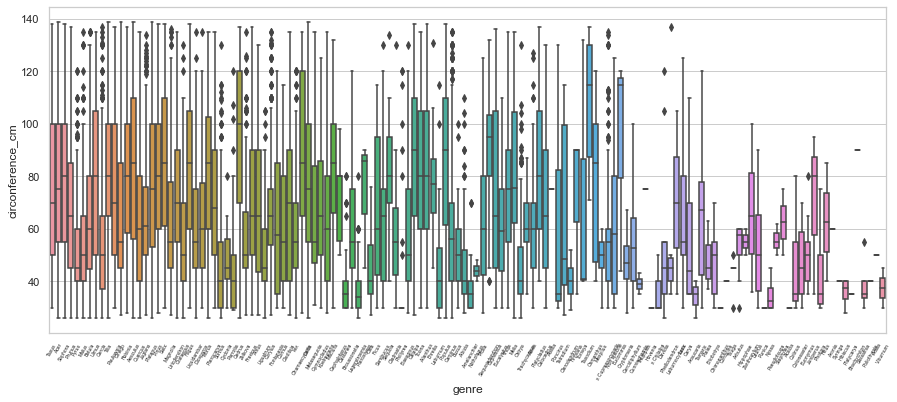

In [273]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.boxplot(y= 'circonference_cm', x= 'genre' , data = df)
plt.xticks(rotation=60, size=5 )

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

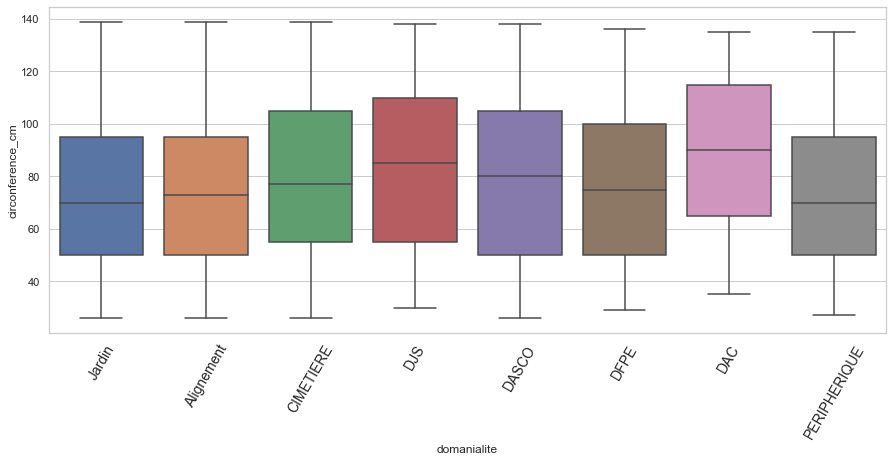

In [277]:

fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.boxplot(y= 'circonference_cm', x= 'domanialite' , data = df)
plt.xticks(rotation=60, size=14)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

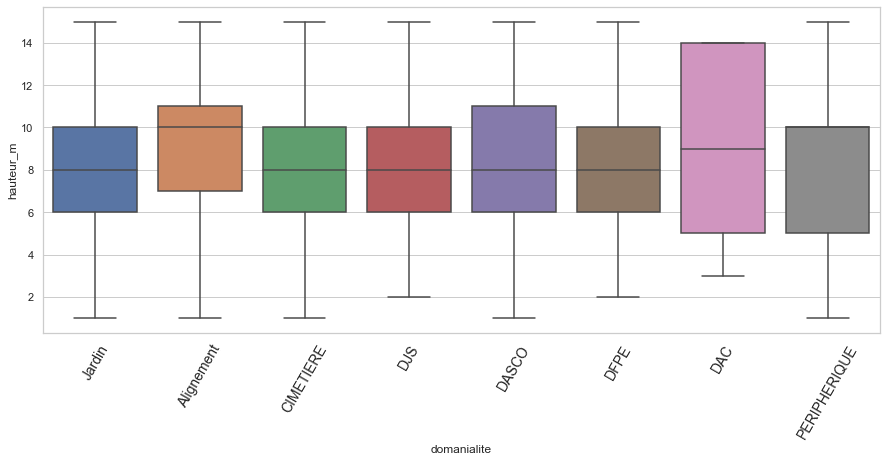

In [278]:
fig,ax=plt.subplots(1,1, figsize = (15,6))
sns.boxplot(y= 'hauteur_m', x= 'domanialite' , data = df)
plt.xticks(rotation=60, size=14)